In [12]:
from scipy.linalg import hilbert
import numpy as np

In [25]:
x = hilbert(10).T
np.linalg.det(np.matrix(x).T * np.matrix(x))


-7.933946394895335e-92

In [26]:
import pandas as pd

# 其中（i，j）的值表示第i列和第j列之间的相关系数        创建一个 DataFrame，并为其指定列名
pd.DataFrame(x, columns=["x%d" % i for i in range(1, 11)]).corr()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,0.985344,0.965392,0.948277,0.934230,0.922665,0.913025,0.904883,0.897921,0.891902
x2,0.985344,1.000000,0.995632,0.988183,0.980720,0.973927,0.967905,0.962598,0.957918,0.953774
x3,0.965392,0.995632,1.000000,0.998160,0.994616,0.990719,0.986928,0.983393,0.980155,0.977207
x4,0.948277,0.988183,0.998160,1.000000,0.999065,0.997120,0.994845,0.992525,0.990281,0.988163
x5,0.934230,0.980720,0.994616,0.999065,1.000000,0.999465,0.998294,0.996860,0.995346,0.993839
x6,0.922665,0.973927,0.990719,0.997120,0.999465,1.000000,0.999669,0.998914,0.997959,0.996922
x7,0.913025,0.967905,0.986928,0.994845,0.998294,0.999669,1.000000,0.999782,0.999271,0.998608
x8,0.904883,0.962598,0.983393,0.992525,0.996860,0.998914,0.999782,1.000000,0.999850,0.999491
x9,0.897921,0.957918,0.980155,0.990281,0.995346,0.997959,0.999271,0.999850,1.000000,0.999893
x10,0.891902,0.953774,0.977207,0.988163,0.993839,0.996922,0.998608,0.999491,0.999893,1.000000


In [33]:
from scipy.optimize import leastsq

In [34]:
np.random.seed(10)  # 随机数种子能保证每次生成的随机数一致


In [35]:
x = hilbert(10)  # 生成 10x10 的希尔伯特矩阵
w = np.random.randint(2, 10, 10)  # 随机生成 w 系数
y_temp = np.matrix(x) * np.matrix(w).T  # 计算 y 值
y = np.array(y_temp.T)[0]  # 将 y 值转换成 1 维行向量

print("实际参数 w: ", w)
print("实际函数值 y: ", y)

实际参数 w:  [3 7 6 9 2 3 5 6 3 7]
实际函数值 y:  [14.14761905 10.1232684   8.12233045  6.8529637   5.95634643  5.28188478
  4.75274309  4.32480306  3.97061256  3.67205737]


In [37]:
func = lambda p, x: np.dot(x, p)  # 函数公式
err_func = lambda p, x, y: func(p, x) - y  # 残差函数


p_init = np.random.randint(1, 2, 10)  # 全部参数初始化为 1
parameters = leastsq(err_func, p_init, args=(x, y))  # 最小二乘法求解
print("拟合参数 w: ", parameters[0])

拟合参数 w:  [  2.99884806   7.06556011   5.11564728  13.58072171  -7.13665053
   0.41780021  46.08282339 -63.11512431  52.24116589  -6.2515245 ]


  岭回归拟合 $ F_{\mathrm{Ridge}}=\|y-Xw\|_2^2+\lambda\|w\|_2^2 $
           $ \hat{w}_{Ridge}=(X^TX+\lambda I)^{-1}X^TY $
  

In [38]:
# sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
    # alpha: 正则化强度，默认为 1.0，对应公式 8 中的 lambda 
    # fit_intercept: 默认为 True，计算截距项。
    # normalize: 默认为 False，不针对数据进行标准化处理。
    # copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
    # max_iter: 最大迭代次数，默认为 None。
    # tol: 数据解算精度。
    # solver: 根据数据类型自动选择求解器。
    # random_state: 随机数发生器。 
    

In [44]:
from sklearn.linear_model import Ridge,LinearRegression


In [45]:
ridge_model = Ridge(fit_intercept=False)  # 参数代表不增加截距项
ridge_model.fit(x, y)

Ridge(fit_intercept=False)

In [49]:
Linearmodel = LinearRegression(fit_intercept=False)  # 参数代表不增加截距项
Linearmodel.fit(x, y)

LinearRegression(fit_intercept=False)

In [50]:
Linearmodel.coef_,ridge_model.coef_

(array([2.99999999, 7.00000071, 5.99998478, 9.0001398 , 1.99932796,
        3.00185886, 4.99693488, 6.00297434, 2.99843309, 7.0003456 ]),
 array([6.3497497 , 4.32792068, 3.40228975, 2.83692059, 2.44632895,
        2.15683095, 1.93213214, 1.75189668, 1.60369747, 1.47944808]))

In [57]:
# 不同 alpha 参数拟合
alphas = np.linspace(1, 10, 20)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

In [58]:
"""绘制不同 alpha 参数结果
"""
from matplotlib import pyplot as plt
%matplotlib inline


Text(0.5, 1.0, 'Ridge Regression')

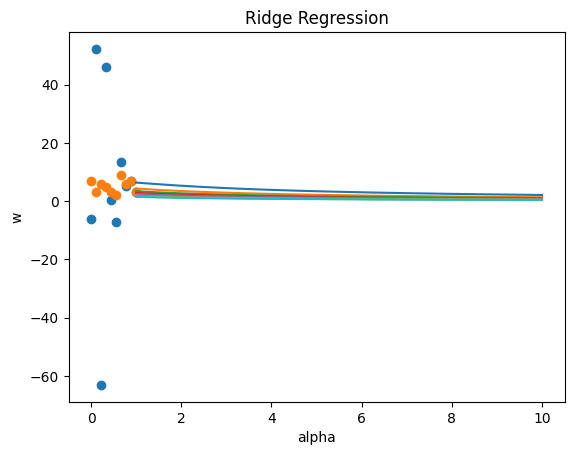

In [63]:

plt.plot(alphas, coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.scatter(np.linspace(1, 0, 10), w)  #  w 真值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Ridge Regression")


 LASSO 回归 $ F_{LASSO}=\|y-Xw\|_2^2+\lambda\|w\|_1 $


In [65]:
# sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# precompute: 是否使用预先计算的 Gram 矩阵来加速计算。
# warm_start  重用先前调用的解决方案以适合初始化。
# positive: 强制系数为正值。
# selection: 每次迭代都会更新一个随机系数。

In [66]:
from sklearn.linear_model import Lasso

In [68]:
alphas = np.linspace(1, 10, 10)
lasso_coefs = []

In [69]:
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)

Text(0.5, 1.0, 'Lasso Regression')

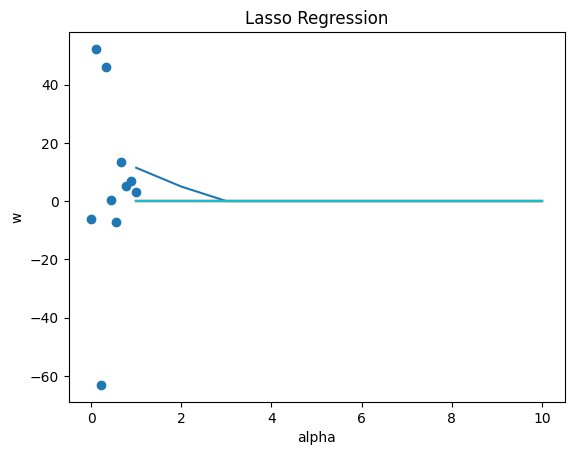

In [70]:

plt.plot(alphas, lasso_coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Lasso Regression")